In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, date


In [33]:
df = pd.read_csv('201703_Taiwan.csv')
print(df)
df = df[(df['PM2.5'] != 0)&(df['PM1'] != 0)&(df['PM10'] != 0)]
print(df)#remove the rows that pm1 pm2.5 pm10 is 0

gp = df.groupby('device_id').size().reset_index(name='counts')#groupby and set name
print(gp)
gp = gp[gp['counts'] > gp['counts'].mean()/2]#select the rows
print(gp)
print( gp['counts'].mean()/2)

df = pd.merge(df,gp,on='device_id')#inner join to keep the rows
print(df)

del df['counts']#delete the column counts
print(df)

               Date      Time     device_id  PM2.5  PM10  PM1  Temperature  \
0        2017-03-01  08:00:00  74DA388FF5F6     41    48   28        20.00   
1        2017-03-01  08:00:01  28C2DDDD4781     41     0    0        23.37   
2        2017-03-01  08:00:01  74DA3895E132     52    66   35        25.50   
3        2017-03-01  08:00:02  74DA3895C590     39    44   26        20.25   
4        2017-03-01  08:00:02  74DA3895C34E     42    56   30        21.12   
5        2017-03-01  08:00:02  74DA3895E12A     74    92   54        21.00   
6        2017-03-01  08:00:03  74DA3895C596     42    53   30        22.25   
7        2017-03-01  08:00:03  74DA3895E182     54    72   38        21.12   
8        2017-03-01  08:00:03  74DA3895E150     51    67   34        26.00   
9        2017-03-01  08:00:04  74DA3895C2B8     26    27   18        22.00   
10       2017-03-01  08:00:04  74DA3895DFD0     36    46   24        21.37   
11       2017-03-01  08:00:04  74DA388FF596     17     0    0   

         device_id  counts
0     28C2DDDD3FE7    3188
1     28C2DDDD41A0    1107
2     28C2DDDD4332    1583
3     28C2DDDD4338    3657
4     28C2DDDD4342    3341
5     28C2DDDD436E    4266
6     28C2DDDD437D     781
7     28C2DDDD4423     155
8     28C2DDDD4501      82
9     28C2DDDD4539    4075
10    28C2DDDD459E    3260
11    28C2DDDD45E6    3308
12    28C2DDDD47A8    3193
13    28C2DDDD47BB    4281
14    74DA388FF3AA    3059
15    74DA388FF3BA    2898
16    74DA388FF3D0    3347
17    74DA388FF3F2     561
18    74DA388FF4A8     439
19    74DA388FF502    2280
20    74DA388FF528     649
21    74DA388FF52E    1866
22    74DA388FF534     898
23    74DA388FF53A    3335
24    74DA388FF552    3397
25    74DA388FF55E       5
26    74DA388FF56C    2748
27    74DA388FF5A8    3069
28    74DA388FF5BC    3294
29    74DA388FF5C4     304
...            ...     ...
1183  74DA38B79424    2749
1184  74DA38B79428    2724
1185  74DA38B7942A    2768
1186  74DA38B7942C    2685
1187  74DA38B7942E    2659
1

In [5]:
device_list = df['device_id'].drop_duplicates()
device_list

0          74DA388FF5F6
1502       74DA3895E132
4795       74DA3895C590
9004       74DA3895C34E
12351      74DA3895E12A
15639      74DA3895C596
19917      74DA3895E182
23153      74DA3895E150
26538      74DA3895C2B8
30922      74DA3895DFD0
32693      74DA3895C1FA
35748      74DA3895C52E
39053      74DA3895E17C
42377      74DA3895C54C
45690      74DA3895C466
49890      74DA3895C2E2
53528      74DA3895C3E0
56607      74DA3895E1A2
59768      74DA3895DF0A
62995      74DA388FF60A
65809      74DA3895DE86
69130      74DA3895C388
72402      74DA3895C234
75485      74DA3895DF3E
78257      74DA3895C5AC
81546      74DA3895DEAA
84803      74DA3895DF98
88080      74DA3895C3B8
92382      74DA3895DEA8
95609      74DA3895DF7A
               ...     
3183830    74DA38B0517E
3186114    74DA3895E0A6
3188160    74DA3895C346
3190380    74DA3895E140
3192574    74DA38B05334
3194794    74DA3895DF32
3197054    74DA3895C48E
3199304    74DA3895DFBC
3200987    74DA38AF47B0
3203026    74DA38B0507C
3205090    74DA3

In [6]:
device_list = df['device_id'].drop_duplicates()
date_list = df['Date'].drop_duplicates()
df['Time'] = pd.to_datetime(df['Time'],format= '%H:%M:%S' ).dt.time

a=[0 for m in range(len(df['Time']))]
for n in date_list:
    for m in device_list:
        tmp_df = df[(df['device_id']==m) & (df['Date']==n)]
        tmp_df.reset_index(inplace=True)
        for i in range(1,len(tmp_df)):
            a[i] = datetime.combine(date.min, tmp_df['Time'][i])-datetime.combine(date.min, tmp_df['Time'][i-1])
            #print(a[i])
            if a[i].seconds > 3600:
                print(a[i].seconds,tmp_df['device_id'][i])
                device_list.drop(device_list.index[i])
                break

#        print(tmp_df['Time'])
#        print(len(tmp_df))
        
#    for i in range(0,len(tmp_df['Time'])):
#        a[i] = datetime.combine(date.min, tmp_df['Time'][i+1]) - datetime.combine(date.min, tmp_df['Time'][i])
#        if a[i].seconds > 3600:
#            print(a[i].seconds,tmp_df['device_id'][i])

#a=[0 for m in range(len(df['Time']))]
#df['Time'] = pd.to_datetime(df['Time'],format= '%H:%M:%S' ).dt.time

#for i in range(0,1000):
#    a[i] = datetime.combine(date.min, df['Time'][i+1]) - datetime.combine(date.min, df['Time'][i])
#    if a[i].seconds > 3600:
#        print(a[i].seconds)
    #print(a[i],df['device_id'][i])



##int_ser_time = [1,2,3]
##for i in range(0,len(df['Time'])):
##    ser_time = df['Time'][i].split(':')
##    int_ser_time[0] = int(ser_time[0])
##    int_ser_time[1] = int(ser_time[1])
##    int_ser_time[2] = int(ser_time[2])
##    df['counts'][i] = int_ser_time[0]*60 + int_ser_time[1]

##print(df['counts'])

#print(type(df['Time'][1]))
#len(df['Time'])



0:29:35
0:11:50
0:11:51
0:17:44
0:05:55
0:05:54
0:05:54
0:05:58
0:11:51
0:05:54
0:11:53
0:53:16
0:05:55
0:41:30
0:05:54
0:05:55
0:17:49
0:23:38
0:59:05
0:05:54
0:35:29
0:23:54
0:05:55
0:17:42
0:11:52
0:05:54
0:05:54
0:11:49
0:29:32
0:05:54
0:05:54
0:23:37
0:05:55
0:05:58
0:05:55
0:05:55
0:47:22
0:23:42
0:05:55
0:11:51
0:11:51
0:05:56
0:11:51
0:23:41
0:11:51
0:53:17
0:05:55
0:05:56
0:11:51
0:05:55
0:23:41
0:11:50
0:05:55
0:23:44
0:17:45
0:35:28
0:23:40
0:05:55
0:05:56
0:17:47
0:05:55
0:17:45
0:05:55
0:05:55
0:05:55
0:35:32
0:05:55
0:05:55
0:05:55
0:11:51
0:05:55
0:05:56
0:35:34
0:23:43
1:05:01
(3901, '74DA3895E132')
0:05:54
0:11:49
0:05:55
0:05:54
0:05:55
0:05:58
0:11:49
0:05:55
0:05:54
0:05:55
0:05:58
0:05:54
0:05:55
0:05:54
0:05:55
0:05:54
0:05:55
0:05:54
0:05:55
0:05:54
0:17:44
0:11:49
0:05:54
0:05:55
0:05:58
0:05:54
0:05:55
0:05:55
0:05:54
0:05:55
0:05:54
0:05:55
0:05:54
0:05:55
0:05:54
0:05:55
0:05:54
0:05:55
0:05:54
0:05:54
0:05:55
0:05:54
0:05:55
0:05:54
0:05:55
0:11:49
0:05:54
0

0:05:55
0:05:55
0:05:55
0:05:56
0:05:56
0:05:55
0:05:58
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:11:50
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:11:50
0:05:55
0:11:49
0:05:56
0:06:41
0:06:39
0:13:40
0:06:48
0:13:33
0:06:48
0:06:30
0:06:40
0:06:48
0:19:35
0:06:45
0:13:23
0:13:35
0:06:44
0:13:18
0:06:32
0:06:49
0:06:42
0:06:38
0:33:40
0:06:44
0:06:49
0:06:42
0:13:22
0:06:45
0:13:37
0:06:37
0:06:44
0:06:49
0:06:41
0:06:37
0:06:44
0:06:42
0:06:33
0:06:49
0:06:52
0:06:41
0:06:32
0:06:46
0:06:57
0:06:44
0:06:44
0:06:41
0:06:54
0:06:36
0:06:54
0:06:32
0:06:42
0:06:41
0:06:54
0:06:51
0:13:15
0:06:42
0:06:46
0:06:47
0:06:49
0:13:32
0:06:49
0:13:26
0:13:13
0:06:37
0:06:51
0:06:53
0:06:50
0:06:41
0:06:29
0:06:39
0:06:45
0:06:42
0:13:58
0:06:41
0:06:50
0:06:38
0:06:42
0:06:56
0:06:35
0:06:39
0:06:38
0:06:50
0:06:41
0:06:49
0:06:56
0:06:53
0:20:25
0:06:57
0:06:39
0:06:41
0:06:40
0:06:48
0:06:50
0:06:50
0:06:55
0:06:41
0:06:46
0:06:48
0:06:35
0:06:44
0:06:41


0:17:46
0:11:49
0:05:55
0:29:34
0:05:55
0:05:55
0:05:55
0:05:55
0:05:54
0:05:55
0:11:50
0:17:45
0:05:55
0:05:55
0:05:54
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:11:51
0:05:55
0:05:55
0:05:59
0:05:52
0:05:55
0:05:55
0:05:58
0:05:52
0:05:56
0:05:55
0:05:55
0:05:55
0:05:56
0:05:55
0:11:50
0:11:51
0:05:55
0:05:56
0:11:50
0:05:56
0:06:04
0:06:03
0:05:41
0:17:43
0:05:58
0:05:53
0:05:58
0:05:52
0:05:55
0:11:57
0:05:55
0:05:52
0:05:56
0:05:55
0:06:01
0:05:51
0:05:56
0:05:55
0:06:04
0:06:06
0:05:38
0:05:55
0:05:55
0:05:55
0:05:56
0:06:04
0:11:48
0:06:06
0:11:33
0:05:55
0:05:55
0:05:55
0:05:57
0:05:57
0:05:53
0:05:55
0:05:55
0:05:57
0:05:53
0:05:57
0:05:53
0:05:57
0:05:53
0:06:12
0:05:38
0:05:55
0:05:56
0:05:58
0:05:52
0:06:40
0:11:05
0:05:56
0:05:55
0:05:55
0:06:15
0:05:37
0:05:56
0:05:57
0:11:48
0:05:58
0:06:02
0:06:06
0:05:34
0:05:55
0:05:58
0:05:55
0:05:52
0:05:55
0:05:58
0:05:55
0:05:57
0:23:47
0:05:54
0:06:13
0:11:29
0:11:51
0:05:55
0:05:55
0:05:55
0:05:55
0:11:55
0:05:56
0:05:58


0:05:58
0:05:53
0:05:56
0:05:55
0:05:54
0:11:57
0:05:47
0:05:55
0:05:54
0:05:55
0:05:54
0:11:51
0:05:54
0:05:54
0:05:55
0:05:54
0:05:55
0:05:57
0:06:00
0:05:46
0:06:08
0:05:43
0:11:52
0:05:55
0:11:49
0:05:58
0:05:54
0:11:50
0:05:55
0:11:49
0:05:55
0:05:55
0:05:55
0:11:50
0:05:55
0:05:55
0:05:55
0:05:55
0:05:54
0:17:44
0:11:50
0:05:55
0:05:54
0:05:55
0:05:55
0:05:55
0:05:55
0:11:49
0:05:55
0:05:55
0:05:54
0:05:59
0:11:49
0:05:55
0:05:54
0:05:55
0:05:55
0:05:55
0:05:54
0:05:55
0:05:55
0:05:54
0:05:55
0:05:55
0:05:55
0:05:55
0:05:54
0:11:50
0:05:55
0:05:54
0:05:55
0:17:44
0:05:55
0:05:54
0:05:55
0:11:50
0:05:54
0:05:55
0:05:55
0:11:49
0:05:55
0:05:55
0:05:55
0:05:54
0:05:55
0:05:55
0:05:55
0:05:54
0:05:55
0:05:55
0:05:55
0:05:54
0:05:55
0:05:58
0:05:55
0:05:55
0:05:54
0:11:50
0:05:54
0:05:55
0:05:55
0:05:54
0:05:55
0:05:54
0:05:55
0:05:55
0:05:54
0:05:55
0:17:44
0:05:54
0:05:55
0:05:54
0:11:50
0:05:54
0:05:55
0:05:55
0:05:55
0:05:54
0:05:55
0:05:55
0:05:55
0:05:54
0:05:55
0:05:55
0:05:54


0:11:50
0:05:54
0:05:55
0:05:55
0:17:45
0:05:54
0:05:55
0:05:55
0:05:55
0:05:55
0:11:49
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:54
0:05:55
0:05:54
0:05:55
0:05:54
0:05:55
0:05:54
0:05:55
0:05:54
0:05:55
0:05:54
0:05:55
0:17:43
0:05:55
0:05:54
0:05:55
0:05:54
0:11:49
0:11:49
0:11:49
0:05:58
0:11:49
0:05:54
0:11:49
0:05:54
0:05:58
0:05:57
0:05:55
0:11:49
0:05:54
0:11:48
0:05:55
0:05:54
0:05:54
0:05:55
0:05:54
0:05:55
0:05:54
0:05:55
0:11:48
0:05:58
0:05:55
0:05:54
0:05:55
0:05:54
0:05:54
0:05:55
0:05:54
0:05:58
0:05:54
0:05:55
0:05:54
0:05:58
0:05:54
0:05:54
0:05:55
0:05:57
0:05:55
0:05:57
0:05:58
0:05:55
0:05:54
0:05:54
0:05:55
0:05:54
0:05:54
0:05:55
0:05:54
0:05:54
0:05:55
0:05:54
0:05:55
0:05:57
0:05:55
0:05:54
0:05:55
0:05:54
0:11:49
0:05:54
0:05:54
0:05:54
0:05:55
0:05:58
0:11:48
0:05:54
0:05:58
0:11:49
0:05:54
0:05:54
0:05:55
0:11:49
0:05:54
0:05:54
0:05:58
0:05:54
0:05:54
0:05:56
0:05:54
0:05:55
0:05:54
0:05:54
0:05:54
0:05:54
0:05:58
0:05:54
0:05:54
0:05:58
0:05:54


(4882, '74DA3895DDF6')
0:11:54
0:11:56
0:05:56
0:25:17
0:05:57
0:05:58
0:17:51
0:35:38
0:05:57
0:05:56
0:29:41
0:11:53
0:05:55
0:50:20
0:29:42
0:05:56
0:17:49
0:05:56
0:11:53
0:23:46
0:05:57
0:32:46
0:17:50
0:11:52
0:17:50
0:05:56
0:17:49
0:23:45
0:11:52
0:05:57
0:05:56
0:20:42
0:17:50
0:05:56
0:05:56
0:05:57
0:11:53
0:05:56
0:05:57
0:16:56
0:05:57
0:11:52
0:05:56
0:23:43
0:05:56
0:47:27
0:05:56
0:05:56
0:17:48
0:47:28
0:11:52
0:05:56
0:05:56
0:05:56
0:05:56
0:11:52
0:45:24
0:23:44
0:11:52
0:05:56
0:05:56
0:05:56
0:11:52
0:05:56
0:11:53
0:11:50
0:05:55
0:05:56
0:05:58
0:11:50
0:05:55
0:11:50
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:11:50
0:05:55
0:05:56
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:11:50
0:05:55
0:05:58
0:05:55
0:05:55
0:05:56
0:05:54
0:05:55
0:05:55
0:05:58
0:23:19
0:05:54
0:05:55
0:05:55
0:05:55
0:05:54
0:05:55
0:05:55
0:05:54
0:05:55
0:11:50
0:05:55
0:17:44
0:05:55
0:05:55
0:17:47
0:17:51
0:05:54
0:11:49
0:05:55
0

0:05:55
0:05:55
0:11:50
0:05:55
0:05:55
0:05:55
0:05:55
0:05:59
0:05:55
0:05:56
0:05:56
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:58
0:05:54
0:05:55
0:05:55
0:11:53
0:05:55
0:05:56
0:05:56
0:05:56
0:17:47
0:23:44
0:23:43
0:05:55
0:23:44
0:29:40
0:17:47
0:11:50
0:17:46
0:11:51
0:17:45
0:05:56
0:05:55
0:17:45
0:05:55
1:14:55
(4495, '74DA3895E02C')
0:06:55
0:13:47
0:06:54
0:07:01
0:06:58
0:13:50
0:06:49
0:06:55
0:06:40
0:06:40
0:06:51
0:06:34
0:06:51
0:06:50
0:06:56
0:06:41
0:06:39
0:06:54
0:06:55
0:06:53
0:06:48
0:13:24
0:06:54
0:06:41
0:06:51
0:20:04
0:06:44
0:13:34
0:06:52
0:06:53
0:06:47
0:06:46
0:06:41
0:06:29
0:06:34
0:12:54
0:06:37
0:13:31
0:06:28
0:06:25
0:06:41
0:06:42
0:06:40
0:06:36
0:06:30
0:06:27
0:06:19
0:06:17
0:06:13
0:06:26
0:06:21
0:06:16
0:06:25
0:06:20
0:06:13
0:06:16
0:06:17
0:06:21
0:12:29
0:06:05
0:06:21
0:06:13
0:06:13
0:06:10
0:06:21
0:06:00
0:06:06
0:06:05
0:06:05
0:06:11
0:06:04
0:06:13
0:06:24
0:06:11
0:06:15
0:06:20
0:12:44
0:06:14
0:06:17
0:06:15
0:06:20
0

0:11:50
0:05:55
0:17:44
0:05:55
0:17:44
1:16:53
(4613, '74DA3895C30E')
0:06:01
0:17:49
0:17:45
0:05:55
0:23:38
0:23:40
0:23:41
1:22:55
(4975, '74DA3895C2A6')
0:05:56
0:11:50
0:05:55
0:05:55
0:05:55
0:23:41
0:11:50
0:05:55
0:41:27
0:05:56
0:11:50
0:17:46
0:53:17
0:05:55
0:17:45
0:11:50
0:05:59
0:17:45
0:11:50
0:17:45
0:05:55
0:05:55
0:23:41
0:05:57
0:47:21
0:05:55
0:05:55
0:17:45
0:05:55
0:17:45
0:05:56
0:05:55
0:11:50
0:23:42
0:41:25
0:05:55
0:05:55
0:11:50
0:05:55
0:05:55
0:17:45
0:05:55
0:17:45
0:05:55
0:17:44
0:05:55
0:11:50
0:05:55
0:29:34
0:17:44
0:11:53
0:11:53
0:05:54
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:11:50
0:11:49
0:05:55
0:05:54
0:05:55
0:05:55
0:29:34
0:05:55
0:05:54
0:05:55
0:05:55
0:23:39
0:05:54
0:23:39
0:11:50
0:05:55
0:11:50
0:11:50
0:05:56
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:05:56
0:05:56
0:05:56
0:05:55
0:05:56
0:11:51
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:11:52
0:05:55
0:11:52
0:05:56
0:05:56
0:05:56
0:11:52
0:05:56
0:05:56
0:05:56
0:05:56
0:05:56
0:

(3912, '74DA3895C262')
0:29:38
0:11:51
0:05:56
0:11:51
1:05:13
(3913, '74DA3895DF68')
0:36:09
0:28:04
1:35:01
(5701, '74DA3895C5D0')
0:41:24
0:29:37
0:05:55
0:41:25
0:06:02
0:29:34
0:17:44
0:11:50
0:23:39
0:05:55
0:11:50
0:11:50
0:05:54
0:05:56
0:29:36
0:17:44
0:05:55
0:11:50
0:11:50
0:17:44
0:17:47
0:05:55
0:17:45
0:11:50
0:29:38
0:11:50
0:05:57
0:17:45
0:11:53
0:11:53
0:11:51
0:11:50
0:05:55
0:05:55
0:11:50
0:05:55
0:11:50
0:17:46
0:17:45
0:05:58
0:11:50
0:05:55
0:17:45
0:05:55
0:47:22
0:05:55
0:59:11
0:11:50
0:11:50
0:17:45
0:11:51
0:23:45
0:05:54
0:05:55
0:05:54
0:05:55
0:23:39
0:23:39
0:23:39
0:35:28
0:17:44
0:29:34
0:05:55
0:11:49
0:11:49
0:05:54
0:29:33
0:05:54
0:17:43
0:05:55
0:11:48
0:05:55
0:05:54
0:05:56
0:11:52
0:23:37
0:05:55
0:05:54
0:17:44
0:05:54
0:17:43
0:05:55
0:53:17
0:23:37
0:05:55
0:11:49
0:05:54
0:35:26
0:05:55
0:17:43
0:05:54
0:35:27
0:11:48
0:05:55
0:35:26
0:05:54
0:11:51
0:17:44
0:47:22
0:23:38
0:17:43
0:11:49
0:53:10
0:23:38
0:05:54
0:05:55
0:17:43
0:11:49
0:1

0:05:54
0:06:11
0:05:38
0:05:57
0:05:54
0:05:54
0:05:54
0:05:55
0:05:54
0:05:57
0:05:51
0:05:58
0:05:51
0:05:54
0:06:57
0:06:35
0:06:52
0:06:42
0:06:41
0:19:56
0:06:44
0:06:39
0:06:42
0:06:33
0:06:39
0:06:42
0:06:41
0:06:37
0:06:48
0:06:37
0:06:38
0:13:27
0:06:55
0:06:25
0:06:38
0:13:16
0:06:39
0:06:43
0:13:02
0:06:22
0:06:29
0:06:24
0:13:02
0:06:31
0:06:11
0:06:22
0:06:21
0:06:11
0:06:02
0:05:54
0:05:56
0:05:59
0:05:54
0:05:54
0:05:56
0:05:58
0:05:55
0:05:59
0:05:56
0:06:01
0:05:53
0:05:54
0:05:54
0:05:58
0:05:57
0:05:54
0:05:54
0:05:54
0:05:55
0:05:57
0:05:56
0:05:55
0:05:54
0:05:54
0:05:55
0:05:54
0:05:54
0:05:57
0:06:06
0:06:02
0:05:56
0:11:56
0:06:01
0:11:57
0:05:56
0:05:54
0:05:57
0:05:59
0:06:03
0:06:05
0:06:05
0:06:07
0:06:02
0:12:05
0:06:04
0:06:10
0:12:15
0:06:15
0:06:25
0:06:12
0:12:05
0:05:59
0:05:56
0:06:02
0:06:11
0:06:09
0:06:06
0:06:09
0:06:03
0:05:59
0:12:10
0:06:04
0:06:18
0:06:10
0:06:06
0:06:14
0:06:08
0:12:17
0:06:00
0:12:02
0:06:01
0:06:01
0:06:02
0:05:55
0:06:06


0:05:55
0:05:54
0:05:56
0:05:54
0:05:57
0:05:52
0:11:49
0:05:56
0:05:54
0:05:58
0:05:55
0:05:54
0:05:54
0:05:55
0:05:55
0:05:54
0:05:55
0:05:54
0:05:55
0:11:52
0:11:47
0:11:50
0:05:55
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:58
0:05:55
0:05:55
0:05:58
0:06:14
0:17:33
0:05:56
0:05:58
0:05:56
0:05:56
0:05:55
0:05:55
0:11:50
0:05:56
0:11:50
0:05:55
0:05:58
0:05:56
0:05:55
0:06:12
0:05:38
0:05:57
0:06:04
0:05:59
0:05:42
0:06:04
0:05:55
0:05:55
0:06:24
0:11:42
0:05:55
0:05:49
0:06:09
0:23:25
0:05:55
0:06:04
0:05:46
0:05:58
0:06:01
0:05:46
0:06:05
0:05:49
0:05:55
0:05:56
0:06:01
0:17:46
0:06:14
0:05:40
0:06:09
0:11:38
0:11:50
0:05:56
0:05:54
0:06:00
0:11:46
0:05:55
0:05:55
0:05:58
0:05:53
0:05:56
0:05:55
0:11:49
0:05:58
0:05:52
0:05:56
0:11:51
0:05:57
0:05:56
0:05:54
0:05:55
0:05:55
0:06:16
0:06:14
0:05:23
0:06:11
0:05:35
0:05:55
0:05:55
0:05:57
0:05:53
0:05:57
0:06:03
0:05:56
0:05:54
0:05:55
0:05:58
0:05:54
0:05:55
0:05:58
0:06:39
0:05:14
0:05:54
0:05:55
0:06:01
0:05:54
0:05:54
0:05:54


0:11:50
0:05:55
0:05:55
0:11:50
0:11:49
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:11:50
0:05:55
0:05:58
0:17:45
0:05:55
0:11:56
0:12:08
0:05:34
0:05:58
0:11:47
0:06:00
0:05:51
0:05:55
0:05:57
0:05:55
0:05:55
0:11:51
0:05:55
0:05:55
0:05:55
0:11:51
0:05:58
0:11:50
0:05:55
0:05:54
0:05:58
0:05:55
0:05:54
0:05:55
0:11:51
0:05:55
0:06:39
0:05:14
0:05:52
0:05:55
0:05:57
0:11:47
0:05:55
0:05:55
0:05:55
0:11:50
0:06:21
0:05:34
0:05:58
0:05:55
0:05:57
0:06:01
0:05:46
0:05:54
0:05:55
0:17:45
0:05:56
0:05:55
0:05:54
0:05:55
0:05:55
0:05:55
0:05:55
0:05:54
0:05:55
0:05:55
0:05:55
0:05:55
0:05:57
0:05:52
0:05:55
0:05:55
0:05:54
0:06:04
0:05:46
0:17:47
0:06:04
0:05:46
0:17:44
0:11:50
0:05:55
0:11:49
0:11:49
0:05:55
0:05:55
0:05:54
0:05:55
0:05:55
0:06:04
0:05:57
0:05:51
0:05:55
0:05:54
0:06:16
0:05:34
0:05:55
0:06:01
0:17:44
0:11:52
0:05:55
0:05:58
0:05:54
0:05:55
0:06:00
0:05:59
0:05:53
0:06:40
0:05:20
0:05:50
0:05:52
0:06:00
0:05:50
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:56
0:11:53


0:05:56
0:05:56
0:05:56
0:05:56
0:05:56
0:06:02
0:05:53
0:06:06
0:11:52
0:05:54
0:05:53
0:05:56
0:05:57
0:05:56
0:05:56
0:05:56
0:05:56
0:06:01
0:11:50
0:06:17
0:11:31
0:05:58
0:05:54
0:05:56
0:05:57
0:05:57
0:05:58
0:05:56
0:05:56
0:11:52
0:05:54
0:05:55
0:05:54
0:05:54
0:05:55
0:05:55
0:05:54
0:05:54
0:11:50
0:05:54
0:05:55
0:05:54
0:05:55
0:11:52
0:11:50
0:05:54
0:05:55
0:05:55
0:05:55
0:05:54
0:05:54
0:05:55
0:05:54
0:05:55
0:11:48
0:05:58
0:05:55
0:05:54
0:05:55
0:05:54
0:05:54
0:05:55
0:05:54
0:05:54
0:05:55
0:05:54
0:05:58
0:05:54
0:11:48
0:05:55
0:05:54
0:05:54
0:05:54
0:05:55
0:05:54
0:05:54
0:05:58
0:05:54
0:05:54
0:05:55
0:05:54
0:05:54
0:05:54
0:05:54
0:05:55
0:05:54
0:05:54
0:11:48
0:05:55
0:05:55
0:05:53
0:05:55
0:05:54
0:05:54
0:05:54
0:05:54
0:11:52
0:05:54
0:11:51
0:05:54
0:17:49
0:11:48
0:05:54
0:05:55
0:05:54
0:05:54
0:11:52
0:05:55
0:11:48
0:05:55
0:05:54
0:05:54
0:05:54
0:05:54
0:05:54
0:05:54
0:05:55
0:05:54
0:05:54
0:05:54
0:05:54
0:05:54
0:05:58
0:05:54
0:05:54


0:05:53
0:05:54
0:05:55
0:05:54
0:05:55
0:05:54
0:05:54
0:05:55
0:11:49
0:05:54
0:05:55
0:05:54
0:05:54
0:05:55
0:05:54
0:11:49
0:05:54
0:05:54
0:05:55
0:05:54
0:17:46
0:29:37
0:41:33
0:17:43
0:11:51
0:05:56
0:05:55
0:43:51
0:41:25
0:05:56
0:05:55
0:29:35
0:17:45
0:05:55
0:29:35
0:23:41
0:05:56
0:11:54
0:23:47
0:05:56
0:17:44
0:05:55
0:23:40
0:17:45
0:05:55
0:05:55
0:45:06
0:05:55
1:01:27
(3687, '74DA3895E0EE')
0:05:55
0:17:45
0:05:55
0:05:55
0:17:45
0:11:49
0:05:55
0:11:50
0:05:55
0:11:50
0:05:55
0:05:55
0:05:56
0:05:54
0:05:56
0:05:55
0:11:50
0:05:55
0:05:55
0:11:50
0:05:55
0:05:55
0:05:55
0:05:55
0:23:40
0:05:56
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:55
0:11:50
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:11:50
0:05:55
0:05:55
0:05:55
0:05:55
0:23:40
0:05:55
0:05:55
0:05:55
0:05:59
0:11:50
0:05:55
0:17:45
0:05:55
0:05:55
0:05:55
0:05:55
0:11:50
0:11:49
0:11:51
0

0:05:56
0:05:55
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:05:56
0:05:55
0:05:56
0:05:58
0:05:56
0:05:56
0:05:56
0:05:56
0:05:56
0:05:55
0:05:56
0:11:50
0:23:39
0:23:39
0:59:11
0:11:50
0:11:50
0:29:35
0:05:55
0:11:49
0:05:55
0:17:44
0:23:38
0:59:07
0:05:55
0:23:38
0:35:31
0:05:55
0:17:44
0:53:15
1:05:05
(3905, '74DA3895DFB8')
0:23:39
0:05:55
0:17:44
0:17:44
0:05:55
0:05:54
0:11:50
0:11:50
0:05:55
0:11:49
0:05:55
0:05:55
0:05:55
0:29:33
0:11:49
0:05:55
0:41:24
0:23:39
0:11:50
0:05:55
0:11:49
0:35:29
0:35:29
0:05:55
0:17:43
0:11:50
0:23:39
0:17:47
0:35:28
0:29:34
0:05:55
0:35:29
0:05:55
0:05:54
0:23:40
0:05:54
0:11:53
0:05:54
0:05:55
0:23:39
0:11:53
0:05:55
0:11:49
0:05:55
0:05:55
0:41:23
0:11:50
0:17:45
0:17:45
0:11:49
0:05:55
0:11:50
0:05:55
0:29:35
0:11:50
0:05:54
0:05:55
0:05:55
0:17:45
0:05:55
0:05:55
0:23:39
0:11:51
0:05:55
0:05:55
0:29:35
0:23:45
0:05:55
0:35:29
0:05:55
0:05:54
0:11:50
0:05:55
0:05:55
0:17:45
0:17:45
1:17:11
(4631, '74DA3895DE64')
0:23:43
0:05:56
0:41:29
0:05:56
0:

0:23:38
0:05:55
0:05:55
0:05:55
0:05:54
0:05:55
0:05:58
0:05:51
0:05:55
0:05:54
0:05:55
0:05:54
0:05:55
0:05:54
0:05:55
0:05:55
0:05:54
0:05:54
0:05:57
0:05:54
0:05:58
0:05:55
0:05:54
0:05:55
0:11:49
0:05:54
0:23:39
0:05:55
0:05:56
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:56
0:23:41
0:05:56
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:56
0:05:55
0:11:51
0:05:55
0:05:56
0:05:55
0:05:56
0:05:55
0:29:39
0:05:55
0:05:55
0:05:56
0:11:51
0:05:56
0:05:55
0:11:51
0:05:56
0:11:50
0:05:56
0:05:55
0:05:56
0:05:55
0:05:55
0:05:56
0:11:51
0:05:55
0:05:56
0:05:55
0:05:56
0:11:50
0:05:56
0:11:50
0:05:56
0:05:55
0:05:56
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:11:50
0:05:55
0:05:55
0:05:56


0:05:55
0:05:55
0:05:54
0:11:53
0:05:55
0:05:54
0:05:55
0:05:55
0:05:56
0:11:50
0:05:56
0:05:55
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:17:46
0:05:56
0:17:46
0:05:56
0:05:55
0:05:55
0:05:56
0:11:50
0:05:56
0:05:55
0:05:55
0:05:56
0:05:55
0:17:46
0:11:51
0:05:55
0:05:56
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:05:55
0:05:56
0:05:55
0:05:56
0:05:55
0:05:56
0:05:55
0:05:55
0:11:51
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:56
0:17:46
0:05:55
0:05:55
0:05:56
0:11:50
0:05:56
0:05:56
0:05:55
0:05:55
0:05:55
0:05:56
0:11:51
0:05:55
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:55
0:05:56
0:05:55
0:05:56
0:05:55
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:56
0:11:50
0:05:55
0:11:51
0:05:56
0:17:45
0:05:56
0:05:55
0:11:50
0:05:56
0:17:45
0:11:51
0:11:51
0:05:55
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:55
0:05:55
0:11:51
0:05:55
0:11:51
0:05:55
0:05:55
0:05:55
0:05:55
0:11:51
0:11:51


0:05:54
0:05:55
0:05:55
0:05:55
0:05:55
0:11:49
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:54
0:05:55
0:05:55
0:05:55
0:05:56
0:05:55
0:05:56
0:05:58
0:05:52
0:05:56
0:05:55
0:05:56
0:05:55
0:05:56
0:05:55
0:05:56
0:05:56
0:11:51
0:05:56
0:05:55
0:05:56
0:05:56
0:05:56
0:05:55
0:05:57
0:11:52
0:05:55
0:11:52
0:05:56
0:05:55
0:05:56
0:05:56
0:11:54
0:05:53
0:05:56
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:05:56
0:05:56
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:11:52
0:05:55
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:05:56
0:05:55
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:11:52
0:05:56
0:05:56
0:11:51
0:05:56
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:05:56
0:11:51
0:05:56
0:11:51
0:05:56
0:05:56
0:05:55
0:05:56
0:11:51
0:05:56
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:05:56
0:05:56
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:05:56
0:05:56


0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:05:56
0:11:54
0:05:56
0:05:55
0:05:56
0:11:51
0:05:56
0:05:56
0:05:55
0:05:56
0:05:56
0:05:55
0:11:51
0:05:56
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:11:50
0:05:54
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:54
0:05:55
0:05:55
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:56
0:05:56
0:05:55
0:05:56
0:05:55
0:05:55
0:05:56
0:05:56
0:05:58
0:05:54
0:05:56
0:05:55
0:05:55
0:05:55
0:05:59
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:11:50
0:05:54
0:05:55
0:05:55
0:05:55
0:11:50
0:05:55
0:05:55
0:05:55
0:05:55
0:05:56
0:05:56
0:05:56
0:05:54
0:05:55
0:05:55
0:05:55
0:05:55
0:05:55
0:05:54
0:05:55
0:05:55
0:05:55
0:05:55
0:05:56
0:05:56
0:05:55
0:11:50
0:11:52
0:17:49
0:05:55
0:05:55
0:05:56
0:05:55
0:05:55
0:05:56
0:11:51
0:05:56
0:11:50
0:11:51
0:05:56
0:05:55
0:05:55
0:05:57
0:05:55


0:05:55
0:05:55
0:35:32
0:23:41
0:05:55
0:17:45
0:11:52
0:11:50
0:11:50
0:11:50
0:05:55
0:29:36
0:11:53
0:17:48
0:05:56
0:05:55
0:11:49
0:05:55
0:41:29
0:59:15
0:05:55
0:05:55
0:35:34
0:05:56
0:11:49
0:35:33
0:23:42
0:11:50
0:53:16
0:05:55
0:17:45
0:17:44
0:17:45
0:05:58
0:17:44
0:05:57
0:05:54
0:41:26
0:05:55
0:23:40
0:05:55
0:17:46
0:05:58
0:23:41
0:05:55
0:11:51
0:23:41
0:41:27
0:17:45
0:47:19
0:05:55
0:35:34
0:05:55
0:05:56
0:11:50
0:17:48
0:35:33
0:05:55
0:05:58
0:29:36
0:17:51
0:11:50
0:11:51
0:05:59
0:05:53
0:11:50
0:17:46
0:05:56
0:05:55
0:11:50
0:11:51
0:17:46
0:05:55
0:05:55
0:17:45
0:11:51
0:29:34
0:23:39
0:05:55
0:05:55
0:05:55
0:11:49
0:05:55
0:05:55
0:05:54
0:05:55
0:05:55
0:11:49
0:35:28
0:29:34
0:05:56
0:29:38
0:47:22
0:05:55
0:05:55
0:05:55
0:17:44
0:11:51
0:05:54
0:05:55
0:11:53
0:05:55
0:23:39
0:11:50
0:11:49
0:16:45
0:17:44
0:17:44
0:11:49
0:17:44
0:11:49
0:41:23
0:47:18
0:05:55
0:05:55
0:17:44
0:05:55
0:11:49
0:05:55
0:11:49
0:05:55
0:29:35
0:11:49
0:29:35
0:11:49


0:12:40
0:06:26
0:06:21
0:06:18
0:06:24
0:06:33
0:06:25
0:06:27
0:06:19
0:06:19
0:06:14
0:06:14
0:06:24
0:06:18
0:06:13
0:06:12
0:06:09
0:06:12
0:06:08
0:12:22
0:06:03
0:06:05
0:06:12
0:06:18
0:41:35
0:05:55
0:29:49
0:47:26
0:17:45
0:17:48
0:11:54
1:28:52
(5332, '74DA3895E036')
0:36:19
0:23:42
0:41:29
0:11:51
0:17:53
0:05:55
0:05:56
0:35:34
0:17:46
0:11:54
0:17:47
0:11:51
0:29:37
0:23:43
0:05:55
0:11:51
0:11:51
0:05:56
0:23:41
0:05:55
0:05:55
0:17:46
0:05:55
0:23:41
0:05:56
0:17:46
0:29:40
0:17:46
0:17:46
0:05:55
0:05:55
0:05:56
0:05:55
0:49:12
0:23:42
0:17:45
0:05:55
0:11:55
0:05:55
0:17:46
0:05:55
0:11:51
0:17:46
0:11:51
0:11:50
0:05:56
0:17:46
0:05:55
0:17:47
0:05:55
0:05:56
0:05:55
0:23:42
0:05:55
0:17:46
0:05:56
0:05:55
0:17:46
0:17:47
0:17:46
0:29:39
0:11:51
0:11:51
0:29:46
0:11:54
0:35:42
0:47:39
0:05:57
0:11:54
0:11:53
0:05:57
0:05:57
0:05:56
0:05:57
0:29:42
0:17:52
0:05:56
0:53:21
0:05:57
0:05:57
0:05:58
0:11:53
0:05:57
0:05:56
0:11:53
0:17:49
0:05:56
0:17:48
0:05:57
0:05:56
0

1:22:51
(4971, '74DA3895E15A')
2:24:37
(8677, '74DA3895E104')
0:06:51
0:47:43
0:20:39
0:06:59
0:13:44
0:13:30
0:06:47
0:13:14
0:13:27
0:06:48
0:46:51
0:13:17
0:45:45
0:06:40
0:26:22
0:19:06
0:43:50
0:12:07
0:18:18
0:12:08
0:30:31
0:18:16
0:06:11
0:06:12
0:06:08
0:06:11
0:06:07
0:06:11
0:55:45
0:37:04
0:12:02
0:06:05
0:37:51
0:19:13
0:12:35
0:06:24
0:06:26
0:06:24
0:12:54
0:19:24
0:06:29
0:06:21
0:25:42
0:12:47
0:31:45
0:19:05
0:06:38
0:12:38
0:32:24
0:19:23
0:19:10
0:12:52
0:06:27
0:06:23
0:06:36
0:06:25
0:23:37
0:05:54
0:05:55
0:05:54
0:23:37
0:05:54
0:17:42
0:23:37
0:05:54
0:11:49
0:05:54
0:17:42
0:05:54
0:17:43
0:23:40
0:05:54
0:05:58
0:53:07
0:23:37
0:05:54
0:05:54
0:05:56
0:05:54
0:11:48
0:29:31
0:11:52
0:11:48
0:05:54
0:05:58
1:11:00
(4260, '74DA3895DFD8')
0:06:55
0:34:04
1:06:18
(3978, '74DA3895C456')
0:29:38
0:05:55
1:11:06
(4266, '74DA3895DFF4')
0:23:44
0:29:42
1:05:08
(3908, '74DA3895DF92')
0:23:44
0:05:56
0:05:55
1:11:10
(4270, '74DA3895C4AC')


KeyboardInterrupt: 

In [15]:
import pandas as pd
adf = pd.read_csv('201703_Taiwan.csv')
adf = adf[(adf['PM2.5'] != 0)&(adf['PM1'] != 0)&(adf['PM10'] != 0)]
agp = adf.groupby('device_id').size().reset_index(name='counts')
agp = agp[agp['counts'] > agp['counts'].mean()/2]
adf = pd.merge(adf,agp,on='device_id')
del adf['counts']

adf['Date'] = pd.to_datetime(adf['Date'] + ' ' + adf['Time'])
del adf['Time']
print(adf)
#index = pd.date_range('1/3/2017', periods=30, freq='T')

device_lis = adf['device_id'].drop_duplicates()
print(device_lis)

fdf = None
print(adf)

for k in device_lis:
    new = adf[adf['device_id']==k].resample('60T',on='Date').mean()
    new = new.fillna(new.mean())
    new['device_id'] = k
    if fdf is None:
        fdf = new
    else:
        fdf = pd.concat([fdf,new],axis=0)
print(fdf)
fdf.to_csv('0316323out.csv', sep='\t', encoding='utf-8')


                       Date     device_id  PM2.5  PM10  PM1  Temperature  \
0       2017-03-01 08:00:00  74DA388FF5F6     41    48   28        20.00   
1       2017-03-01 08:29:35  74DA388FF5F6     48    57   35        20.12   
2       2017-03-01 08:41:25  74DA388FF5F6     47    58   34        19.87   
3       2017-03-01 08:53:16  74DA388FF5F6     57    71   44        19.37   
4       2017-03-01 09:11:00  74DA388FF5F6     70    87   59        19.62   
5       2017-03-01 09:16:55  74DA388FF5F6     55    69   43        19.37   
6       2017-03-01 09:22:49  74DA388FF5F6     44    53   31        19.25   
7       2017-03-01 09:28:43  74DA388FF5F6     43    52   30        19.12   
8       2017-03-01 09:34:41  74DA388FF5F6     42    50   30        19.12   
9       2017-03-01 09:46:32  74DA388FF5F6     41    47   30        19.25   
10      2017-03-01 09:52:26  74DA388FF5F6     42    50   30        19.50   
11      2017-03-01 10:04:19  74DA388FF5F6     42    50   31        20.00   
12      2017

[3240425 rows x 9 columns]
                         PM2.5       PM10        PM1  Temperature   Humidity  \
Date                                                                           
2017-03-01 08:00:00  48.250000  58.500000  35.250000    19.840000  88.500000   
2017-03-01 09:00:00  48.142857  58.285714  36.142857    19.318571  87.714286   
2017-03-01 10:00:00  49.000000  59.500000  37.000000    20.250000  85.500000   
2017-03-01 11:00:00  47.250000  57.250000  34.000000    20.905000  83.500000   
2017-03-01 12:00:00  42.000000  48.000000  31.000000    20.560000  79.000000   
2017-03-01 13:00:00  37.500000  42.500000  28.000000    21.000000  77.000000   
2017-03-01 14:00:00  33.000000  35.666667  25.333333    21.416667  70.000000   
2017-03-01 15:00:00  37.400000  41.800000  27.800000    21.024000  62.600000   
2017-03-01 16:00:00  40.666667  46.500000  31.166667    20.580000  63.166667   
2017-03-01 17:00:00  51.333333  62.333333  41.000000    21.040000  64.000000   
2017-03-01 18

In [18]:
dff = pd.read_csv('201703_Taiwan.csv')
dff = dff[(dff['Date']=='2017-03-31') & (dff['device_id']=='74DA3895DF14')]
dff

,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
4084278,2017-03-31,07:55:16,74DA3895DF14,55,72,37,26.37,82,23.28,120.467
4085569,2017-03-31,08:07:08,74DA3895DF14,54,71,37,26.62,81,23.28,120.467
4086841,2017-03-31,08:19:00,74DA3895DF14,54,71,37,27.00,80,23.28,120.467
4088139,2017-03-31,08:30:52,74DA3895DF14,59,78,41,27.25,80,23.28,120.467
4088802,2017-03-31,08:36:48,74DA3895DF14,66,84,47,27.37,80,23.28,120.467
4089481,2017-03-31,08:42:45,74DA3895DF14,84,99,59,27.50,79,23.28,120.467
4090163,2017-03-31,08:48:42,74DA3895DF14,149,179,106,27.62,78,23.28,120.467
4091512,2017-03-31,09:00:36,74DA3895DF14,139,164,98,27.75,77,23.28,120.467
4092188,2017-03-31,09:06:33,74DA3895DF14,129,153,92,27.87,77,23.28,120.467
4094216,2017-03-31,09:24:25,74DA3895DF14,68,84,49,28.12,76,23.28,120.467


<IPython.core.display.Javascript object>


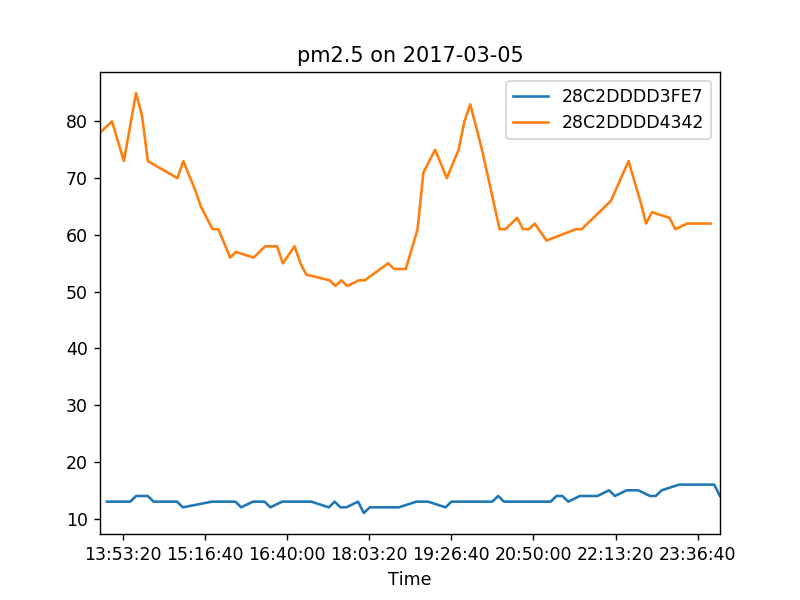

<IPython.core.display.Javascript object>


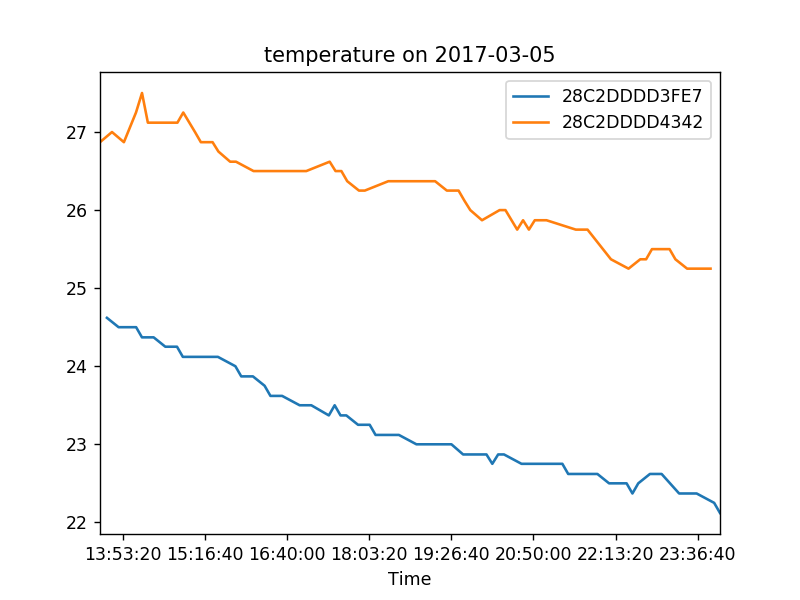

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

pdf = pd.read_csv('201703_Taiwan.csv')
pdf['Time'] = pd.to_datetime(pdf['Time'],format= '%H:%M:%S' ).dt.time
pdf1 = pdf
pdf2 = pdf

#pdf1 = pdf1[(pdf1['Date']=='2017-03-05')&(pdf1['device_id']=='28C2DDDD3FE7')].reset_index(drop=True)
#pdf2 = pdf2[(pdf2['Date']=='2017-03-05')&(pdf2['device_id']=='28C2DDDD4342')].reset_index(drop=True)
#plt.plot(pdf1['PM2.5'],label='28C2DDDD3FE7')
#plt.plot(pdf2['PM2.5'],label='28C2DDDD4342')
#plt.legend(loc='best')
#plt.title('2017-03-05')

#f1 = plt.figure(1)
#f2 = plt.figure(2)
pdf1 = pdf1[(pdf1['Date']=='2017-03-05')&(pdf1['device_id']=='28C2DDDD3FE7')]
pdf2 = pdf2[(pdf2['Date']=='2017-03-05')&(pdf2['device_id']=='28C2DDDD4342')]
#ax1 = f1.add_subplot(111)
ax1=pdf1.plot(x='Time', y='PM2.5',label='28C2DDDD3FE7')
pdf2.plot(x='Time', y='PM2.5',ax=ax1,label='28C2DDDD4342')
plt.title('pm2.5 on 2017-03-05')

#ax2 = f2.add_subplot(111)
ax2 = pdf1.plot(x='Time', y='Temperature',label='28C2DDDD3FE7')
pdf2.plot(x='Time', y='Temperature',ax=ax2,label='28C2DDDD4342')
plt.title('temperature on 2017-03-05')
plt.show()




In [64]:
import pandas as pd
mdf = pd.read_csv('201703_Taiwan.csv') 
del mdf['Date']
del mdf['Time']
del mdf['PM2.5']
del mdf['PM10']
del mdf['PM1']
del mdf['Humidity']
del mdf['Temperature']
mdf = mdf.drop_duplicates(keep = 'first')
mdf = mdf.reset_index(drop=True)
pd.set_option('display.max_rows', None)
for i in range (0,len(mdf)):
    print(i,"G",mdf[' lat'].iloc[i],mdf[' lon'].iloc[i],"A")


(0, 'G', 25.059000000000001, 121.499, 'A')
(1, 'G', 23.483000000000001, 120.443, 'A')
(2, 'G', 22.624000000000002, 120.35600000000001, 'A')
(3, 'G', 24.251999999999999, 120.73899999999999, 'A')
(4, 'G', 24.195999999999998, 120.74799999999999, 'A')
(5, 'G', 22.633000000000003, 120.35899999999999, 'A')
(6, 'G', 24.131, 120.64399999999999, 'A')
(7, 'G', 22.713000000000001, 120.292, 'A')
(8, 'G', 25.061999999999998, 121.45100000000001, 'A')
(9, 'G', 24.166, 120.682, 'A')
(10, 'G', 24.108000000000001, 120.63200000000001, 'A')
(11, 'G', 25.206999999999997, 121.65100000000001, 'A')
(12, 'G', 24.188000000000002, 120.595, 'A')
(13, 'G', 22.628, 120.33200000000001, 'A')
(14, 'G', 24.094000000000001, 120.64700000000001, 'A')
(15, 'G', 22.881999999999998, 120.32899999999999, 'A')
(16, 'G', 24.179000000000002, 120.61399999999999, 'A')
(17, 'G', 24.173000000000002, 120.652, 'A')
(18, 'G', 25.065999999999999, 121.48399999999999, 'A')
(19, 'G', 25.111000000000001, 121.85600000000001, 'A')
(20, 'G', 24

In [43]:
import pandas as pd
qdf = pd.read_csv('201703_Taiwan.csv')
qdf1 = qdf
qdf2 = qdf
qdf3 = qdf
qdf4 = qdf

print('##############################')

ans1 = qdf1['device_id'].drop_duplicates()
print('Answer1: ',len(ans1))

print('##############################')

value2 = qdf2['Temperature'].max()
print(value2)
ans2 = qdf2[qdf2['Temperature']==value2]
del ans2['Date']
del ans2['Time']
del ans2['PM2.5']
del ans2['PM10']
del ans2['PM1']
del ans2['Humidity']
print('Answer2: ',ans2)

print('##############################')

qdf3 = qdf3[qdf3['Date']=='2017-03-05']
gp3 = qdf3.groupby('device_id')['PM2.5'].max() 
print(gp3)

print('##############################')

gp4 = qdf4.groupby('device_id').size().reset_index(name='counts')
gp4 = gp4[gp4['counts'] > gp4['counts'].mean()/2]
qdf4 = pd.merge(qdf4,gp4,on='device_id')
#print(gp4)
#print(qdf4)

qdf4 = qdf4.groupby('device_id')['PM2.5'].mean().reset_index(name='mean_value')
max4 = qdf4['mean_value'].max()
adf4 = qdf4[qdf4['mean_value']==max4]
print(max4)
print(adf4)

##############################
('Answer1: ', 1539)
##############################
58.5
('Answer2: ',             device_id  Temperature     lat      lon
1607643  74DA38B79470         58.5  37.471  127.039
1618348  74DA38B79470         58.5  37.471  127.039)
##############################
device_id
28C2DDDD3FE7     16
28C2DDDD3FFA     87
28C2DDDD4003     60
28C2DDDD400A     86
28C2DDDD4023     62
28C2DDDD40E0     44
28C2DDDD40FD     77
28C2DDDD4140     52
28C2DDDD4149     76
28C2DDDD415C     96
28C2DDDD415F     32
28C2DDDD41B2     76
28C2DDDD41EB     98
28C2DDDD41FA     91
28C2DDDD4229     87
28C2DDDD4233     81
28C2DDDD4236     40
28C2DDDD4239     85
28C2DDDD4242     34
28C2DDDD4244     71
28C2DDDD4246     87
28C2DDDD42F7     76
28C2DDDD432A     35
28C2DDDD4338     52
28C2DDDD433C     53
28C2DDDD4342     85
28C2DDDD4343     43
28C2DDDD4344     78
28C2DDDD434A     76
28C2DDDD434D     89
               ... 
74DA38AF491A    100
74DA38AF4924     83
74DA38AF4928    153
74DA38AF492A     50
7

                   Date      PM2.5       PM10        PM1  Temperature  \
0   2017-03-05 13:00:00  13.000000  14.500000  10.000000    24.560000   
1   2017-03-05 14:00:00  13.250000  14.250000   9.625000    24.341250   
2   2017-03-05 15:00:00  12.750000  13.500000   9.250000    24.027500   
3   2017-03-05 16:00:00  12.833333  14.333333   9.000000    23.643333   
4   2017-03-05 17:00:00  12.285714  13.571429   8.714286    23.372857   
5   2017-03-05 18:00:00  12.285714  13.857143   8.714286    23.104286   
6   2017-03-05 19:00:00  12.833333  14.500000   9.666667    22.935000   
7   2017-03-05 20:00:00  13.142857  14.428571   9.714286    22.801429   
8   2017-03-05 21:00:00  13.750000  15.375000  10.375000    22.668750   
9   2017-03-05 22:00:00  14.571429  15.857143  11.285714    22.515714   
10  2017-03-05 23:00:00  15.500000  17.166667  12.000000    22.350000   
11  2017-03-06 00:00:00  15.625000  17.125000  12.125000    22.168750   
12  2017-03-06 01:00:00  16.000000  18.000000  12.1

<IPython.core.display.Javascript object>


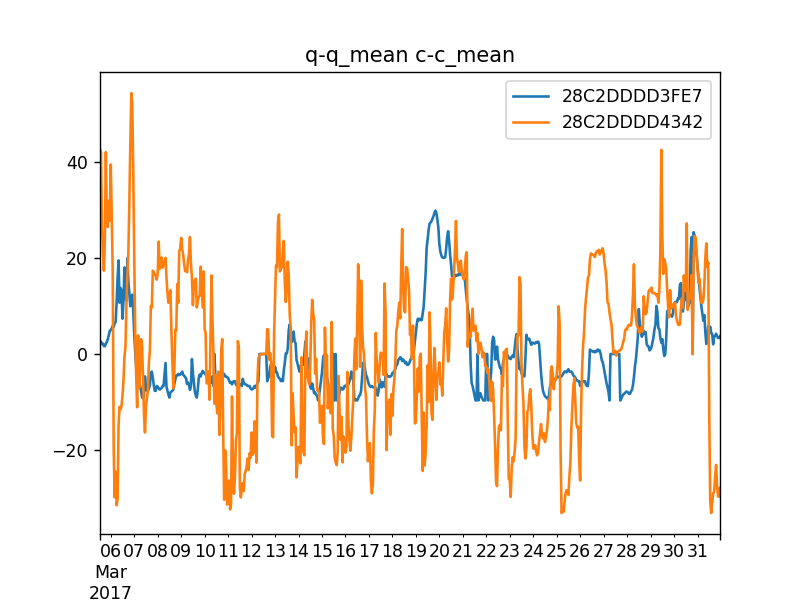

<IPython.core.display.Javascript object>


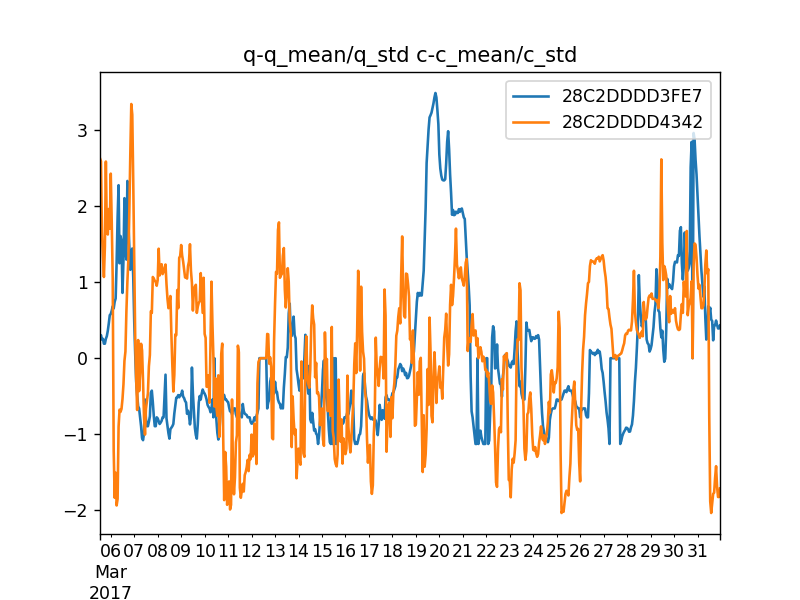

In [23]:
#28C2DDDD3FE7
#28C2DDDD4342
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
qq1 = fdf[fdf['device_id']=='28C2DDDD3FE7']
cc1 = fdf[fdf['device_id']=='28C2DDDD4342']
qq = qq1.reset_index(inplace=False)
cc = cc1.reset_index(inplace=False)
print(qq)
q_mean = qq['PM2.5'].mean()
c_mean = cc['PM2.5'].mean()
q_std = qq['PM2.5'].std()
c_std = cc['PM2.5'].std()
print(q_mean)
print(c_mean)
print(q_std)
print(c_std)
qq['q_qmean']= qq['PM2.5']-q_mean
cc['c_cmean']= cc['PM2.5']-c_mean
qq['q_qmeanstd']= qq['q_qmean']/q_std
cc['c_cmeanstd']= cc['c_cmean']/c_std

bx1=qq.plot(x='Date', y='q_qmean',label='28C2DDDD3FE7')
cc.plot(x='Date', y='c_cmean',ax=bx1,label='28C2DDDD4342')
plt.title('q-q_mean c-c_mean')

bx2=qq.plot(x='Date', y='q_qmeanstd',label='28C2DDDD3FE7')
cc.plot(x='Date', y='c_cmeanstd',ax=bx2,label='28C2DDDD4342')
plt.title('q-q_mean/q_std c-c_mean/c_std')
plt.show()

('D(Q,C): ', 418.69317194451759)


<IPython.core.display.Javascript object>


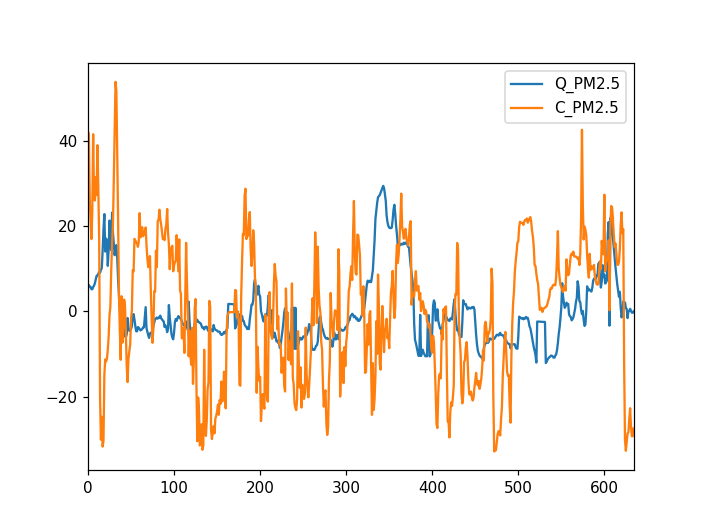

In [35]:
import scipy.signal
ltqc = pd.DataFrame(columns=['Q_PM2.5','C_PM2.5'])
ltqc['Q_PM2.5']=scipy.signal.detrend(qq['PM2.5'])
ltqc['C_PM2.5']=scipy.signal.detrend(cc['PM2.5'])
lt_dis_qc = np.square(ltqc['Q_PM2.5']-ltqc['C_PM2.5'])

print('D(Q,C): ',np.sqrt(lt_dis_qc.sum()))
ltqc.plot()
plt.show()


('D(SMOOTH_Q,SMOOTH_C):', 290.43085290222348)


<IPython.core.display.Javascript object>


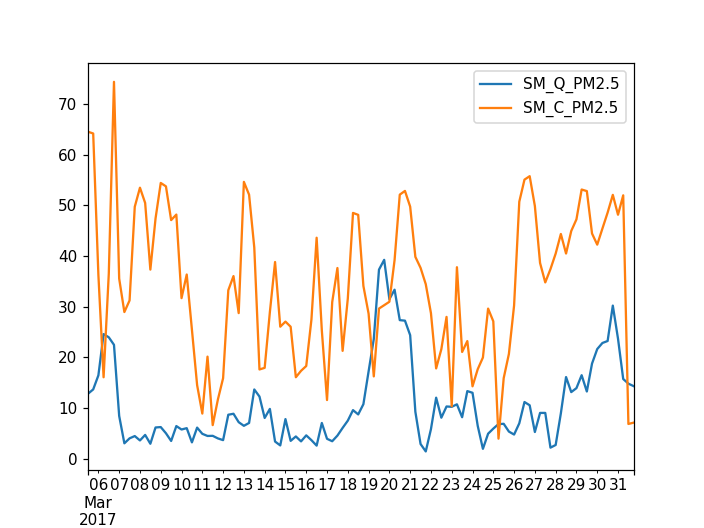

In [39]:
sm_q_c = pd.DataFrame(columns=['SM_Q_PM2.5','SM_C_PM2.5'])

sm_q_c['SM_Q_PM2.5'] = qq1['PM2.5'].resample('6H').mean()
sm_q_c['SM_C_PM2.5'] = cc1['PM2.5'].resample('6H').mean()

sm_dis_q_c = np.square(sm_q_c['SM_Q_PM2.5']-sm_q_c['SM_C_PM2.5'])

print('D(SMOOTH_Q,SMOOTH_C):', np.sqrt(sm_dis_q_c.sum()))
sm_q_c.plot()
plt.show()